In [1]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train = pd.read_csv('./assets/train.csv', parse_dates=['Date'])

In [3]:
important_addresses = """4600  N MILWAUKEE AVE, Chicago, IL
1000  W OHARE AIRPORT
8200  S KOSTNER AVE
3900  N SPRINGFIELD AVE
1700  W 95TH ST
1200  S DOTY AVE
5000  S UNION AVE
5100  N MONT CLARE AVE
5000  S CENTRAL AVE
5800  N RIDGE AVE
6100  W FULLERTON AVE
2200  W 89TH ST
3800  E 115TH ST
2200  W 51ST ST
1000  S VINCENNES
6500  N OAK PARK AVE
1000  W OHARE
7000  N MOSELL AVE
7900  S CHICAGO AVE""".split('\n')

important_addresses

['4600  N MILWAUKEE AVE, Chicago, IL',
 '1000  W OHARE AIRPORT',
 '8200  S KOSTNER AVE',
 '3900  N SPRINGFIELD AVE',
 '1700  W 95TH ST',
 '1200  S DOTY AVE',
 '5000  S UNION AVE',
 '5100  N MONT CLARE AVE',
 '5000  S CENTRAL AVE',
 '5800  N RIDGE AVE',
 '6100  W FULLERTON AVE',
 '2200  W 89TH ST',
 '3800  E 115TH ST',
 '2200  W 51ST ST',
 '1000  S VINCENNES',
 '6500  N OAK PARK AVE',
 '1000  W OHARE',
 '7000  N MOSELL AVE',
 '7900  S CHICAGO AVE']

In [4]:
# map addresses to lat/long
cols = ['Longitude', 'Latitude']
important_latlong = pd.DataFrame(columns=cols)

for address in important_addresses:
    important_latlong = important_latlong.append(
        train[train.AddressNumberAndStreet.str.contains(address)].loc[:, cols].head(1),
        ignore_index=True)
    
important_latlong  

,Longitude,Latitude
0,-87.757639,41.964242
1,-87.890615,41.974689
2,-87.731435,41.743402
3,-87.725057,41.951866
4,-87.666014,41.720848
5,-87.599862,41.673408
6,-87.642984,41.803423
7,-87.805059,41.973845
8,-87.763416,41.801498
9,-87.666066,41.987280


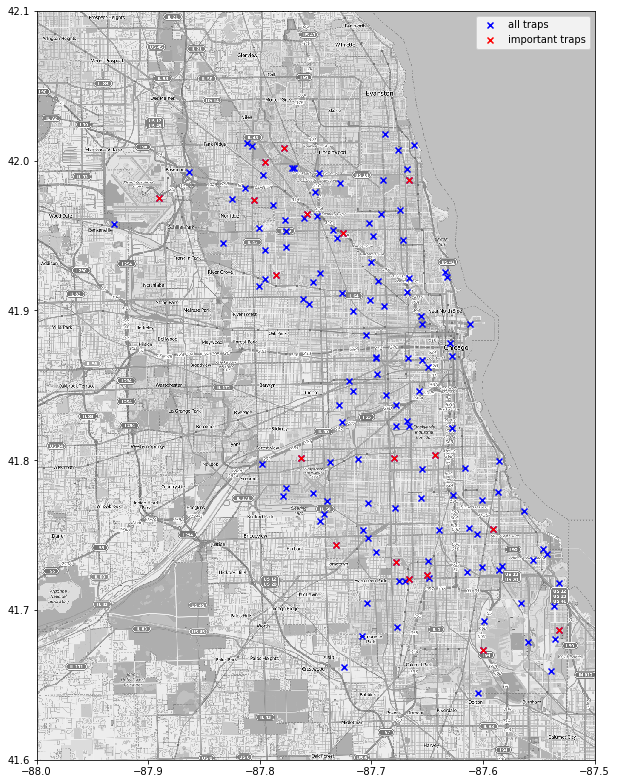

In [5]:
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

# plot the map
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

# plot the traps
all_traps = train[['Longitude', 'Latitude']].drop_duplicates().values
important_latlong = important_latlong.drop_duplicates().values

plt.scatter(all_traps[:,0], all_traps[:,1], marker='x', color='blue', label='all traps');
plt.scatter(important_latlong[:,0], important_latlong[:,1], marker='x', color='red', label='important traps');
plt.legend();

plt.savefig('important_trap_map.png');